In [6]:
import pandas as pd

# Carregar o arquivo CSV
data = pd.read_csv('teste_indicium_precificacao.csv')

# Preencher valores ausentes de forma segura
data['nome'] = data['nome'].fillna('Desconhecido')
data['host_name'] = data['host_name'].fillna('Desconhecido')
data['ultima_review'] = data['ultima_review'].fillna('Sem Avaliação')
data['reviews_por_mes'] = data['reviews_por_mes'].fillna(0)

# Verificar novamente valores ausentes
missing_values_after = data.isnull().sum()
print(missing_values_after[missing_values_after > 0])  # Deve exibir um DataFrame vazio



Series([], dtype: int64)


## Tratamento de Valores Ausentes

Durante a análise inicial, identifiquei valores ausentes nas seguintes colunas:
- **`nome`**: 16 valores ausentes.
- **`host_name`**: 21 valores ausentes.
- **`ultima_review`**: 10.052 valores ausentes.
- **`reviews_por_mes`**: 10.052 valores ausentes.

### Decisão de Tratamento:
- Preenchi os valores ausentes de `nome` e `host_name` com `"Desconhecido"`, uma vez que essas informações são textuais e não impactam diretamente as análises.
- Para `ultima_review`, usei `"Sem Avaliação"`, indicando que esses anúncios não possuem avaliações registradas.
- Já em `reviews_por_mes`, alterei por `0`, o que faz sentido no contexto de ausência de avaliações.

### Resultado:
Após o preenchimento, confirmei que não há mais valores ausentes no conjunto de dados. Este é um passo importante para garantir a integridade das análises futuras.


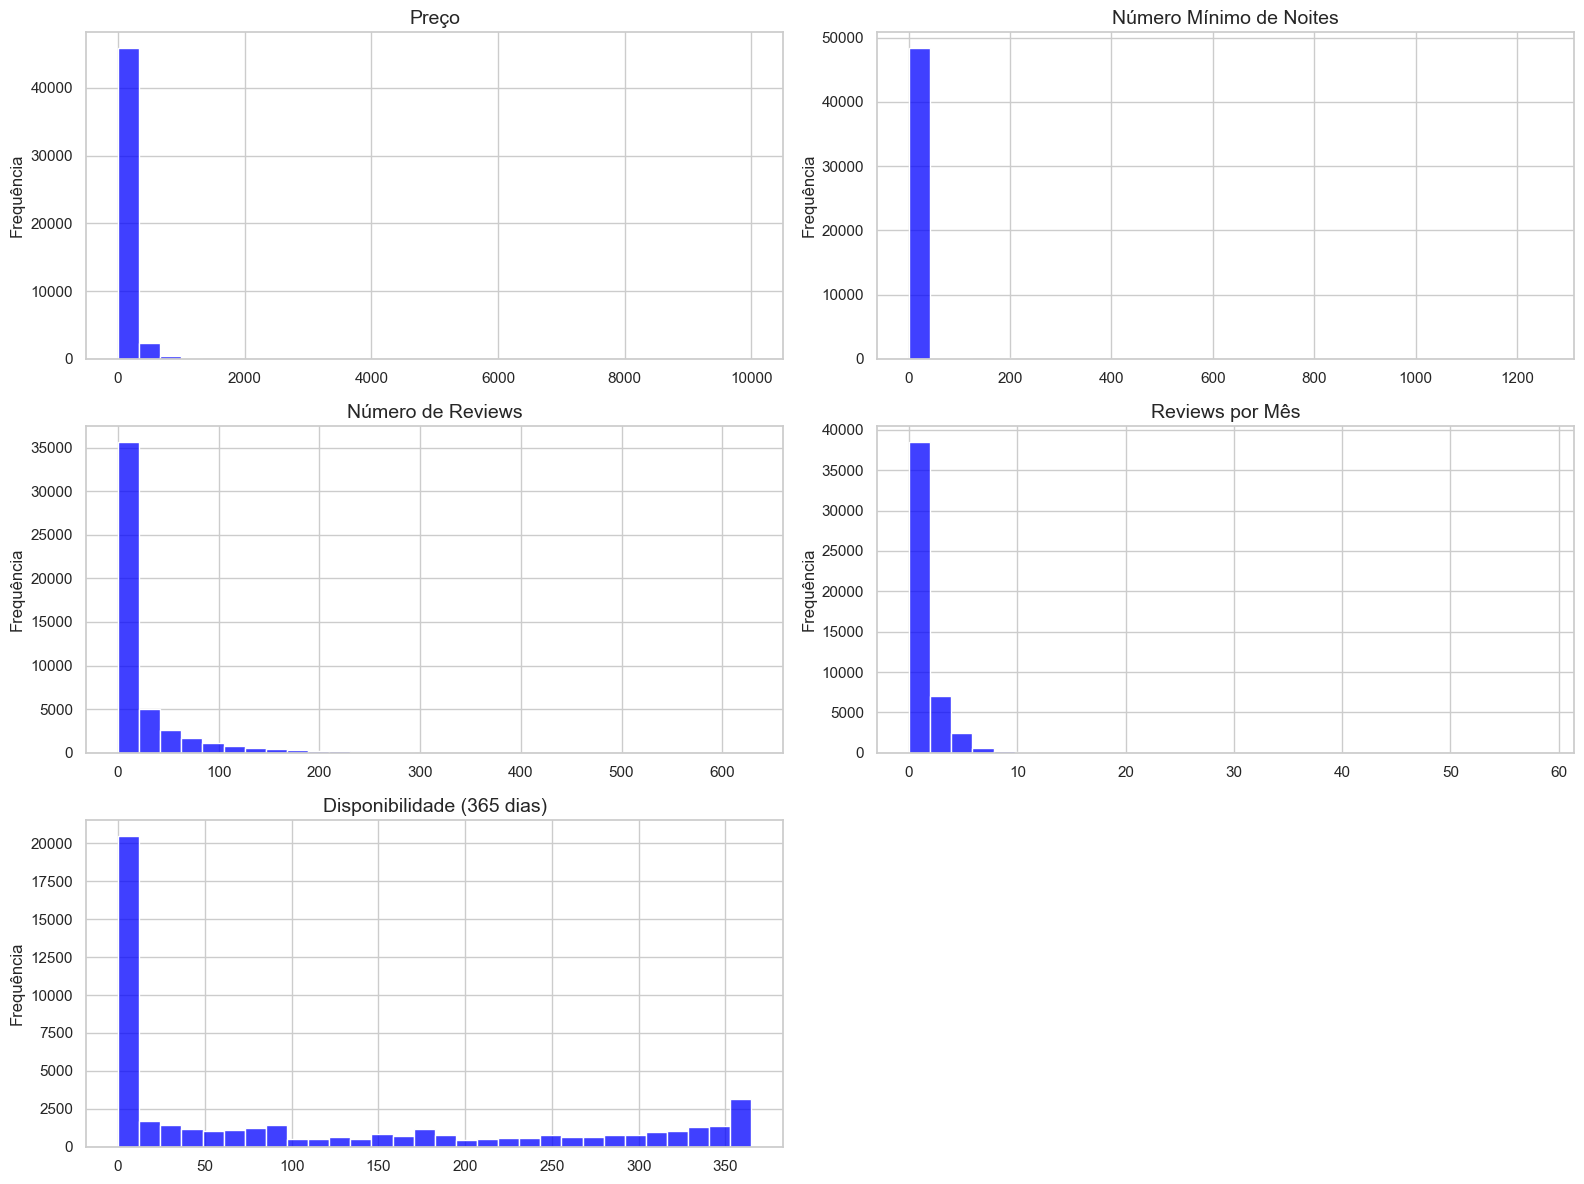

In [9]:
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

columns = ['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'disponibilidade_365']
titles = ['Preço', 'Número Mínimo de Noites', 'Número de Reviews', 'Reviews por Mês', 'Disponibilidade (365 dias)']

for i, ax in enumerate(axes.flatten()[:5]):
    sns.histplot(data[columns[i]], bins=30, kde=False, ax=ax, color='blue')  # kde=False remove a linha de densidade
    ax.set_title(titles[i], fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Frequência')

fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()



## Análise Gráfica das Variáveis Numéricas

Nesta etapa, criei histogramas para visualizar a distribuição das variáveis numéricas do conjunto de dados. 

### Variáveis Analisadas:
1. **Preço** (`price`): O preço por noite dos anúncios.
2. **Número Mínimo de Noites** (`minimo_noites`): Quantidade mínima de noites exigida por reserva.
3. **Número de Reviews** (`numero_de_reviews`): Total de avaliações recebidas pelo anúncio.
4. **Reviews por Mês** (`reviews_por_mes`): Média de reviews mensais do anúncio.
5. **Disponibilidade (365 dias)** (`disponibilidade_365`): Número de dias no ano em que o anúncio está disponível para reservas.

Os gráficos acima mostram a distribuição dessas variáveis no conjunto de dados.

## Observações das Distribuições

1. **Preço**: A maior concentração está em valores abaixo de $500.
2. **Número Mínimo de Noites**: A maioria dos anúncios aceita reservas de apenas 1 noite.
3. **Número de Reviews** e **Reviews por Mês**: A maioria dos anúncios tem poucos reviews ou nenhum review por mês, mas há alguns muito populares com alto número de avaliações.
4. **Disponibilidade**: Muitos anúncios estão disponíveis por menos de 100 dias, mas há uma quantidade significativa disponível durante todo o ano.

Essas informações ajudam a identificar padrões gerais e outliers que podem impactar análises futuras.



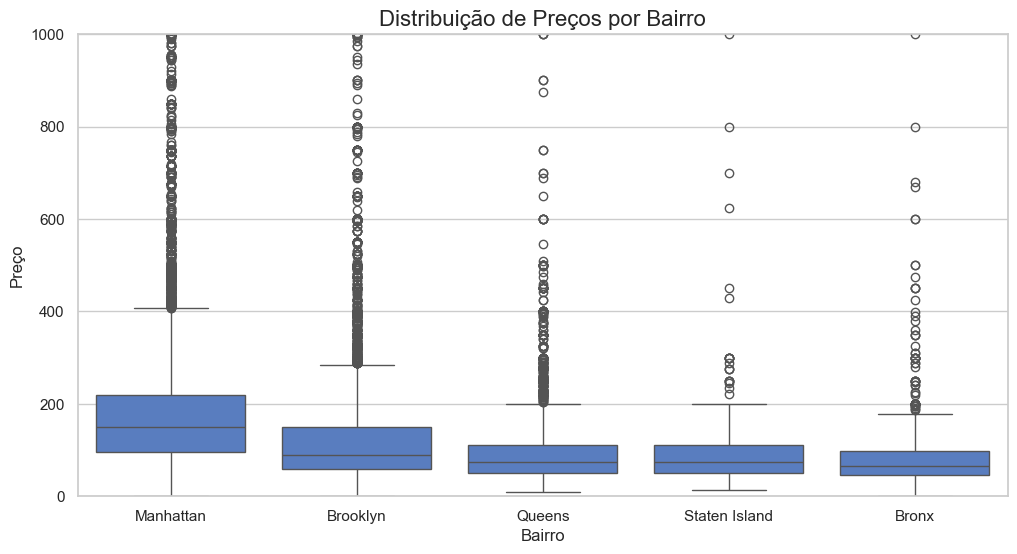

In [11]:
import seaborn as sns

sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(12, 6))
sns.boxplot(x='bairro_group', y='price', data=data)
plt.title('Distribuição de Preços por Bairro', fontsize=16)
plt.xlabel('Bairro', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.ylim(0, 1000)  
plt.show()


## Distribuição de Preços por Bairro

Este gráfico mostra a variação dos preços por bairro. As principais observações são:

1. **Manhattan** é o bairro com a mediana de preços mais alta, indicando que é o mais caro para estadias.
2. **Brooklyn** aparece como o segundo bairro mais caro, mas ainda com preços mais acessíveis que Manhattan.
3. **Queens, Staten Island e Bronx** possuem preços medianos mais baixos, com Staten Island e Bronx sendo os bairros mais baratos.

Essas informações podem ser úteis para entender a influência da localização no preço e ajudar na análise de investimento.


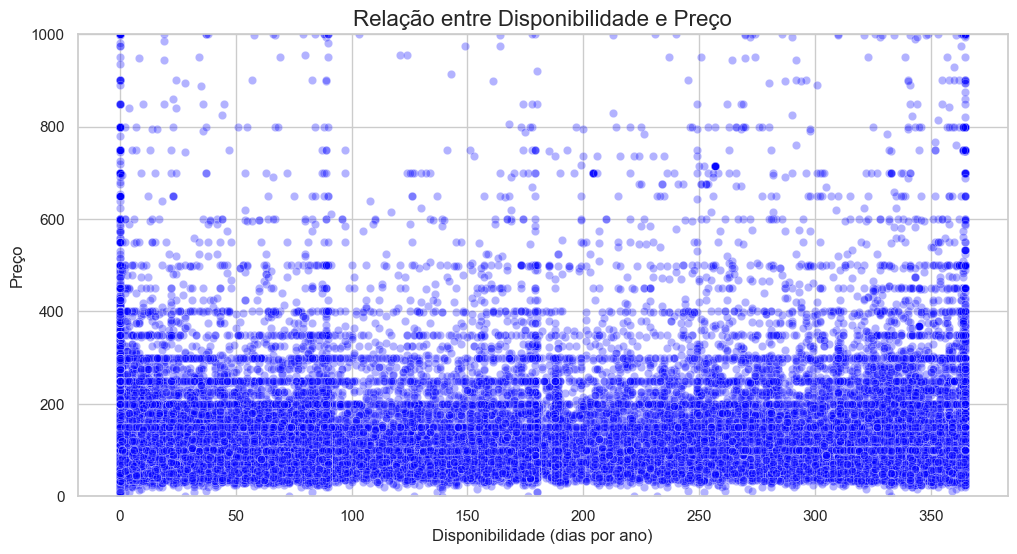

In [12]:
# Disponibilidade vs. Preço
plt.figure(figsize=(12, 6))
sns.scatterplot(x='disponibilidade_365', y='price', data=data, alpha=0.3, color='blue')
plt.title('Relação entre Disponibilidade e Preço', fontsize=16)
plt.xlabel('Disponibilidade (dias por ano)', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.ylim(0, 1000) 
plt.show()


## Relação entre Disponibilidade e Preço

O objetivo deste gráfico é entender se a quantidade de dias que um anúncio está disponível no ano impacta diretamente o preço cobrado por noite.

### Observações:
1. A maioria dos anúncios está concentrada em preços baixos (abaixo de $200), independentemente da disponibilidade.
2. Anúncios disponíveis durante todo o ano (365 dias) apresentam grande variação de preços, mas a maioria também está na faixa de preços baixos.
3. Não foi possível identificar uma relação clara entre alta disponibilidade e preços altos.

Essas informações sugerem que outros fatores, como localização, podem ser mais determinantes para o preço.


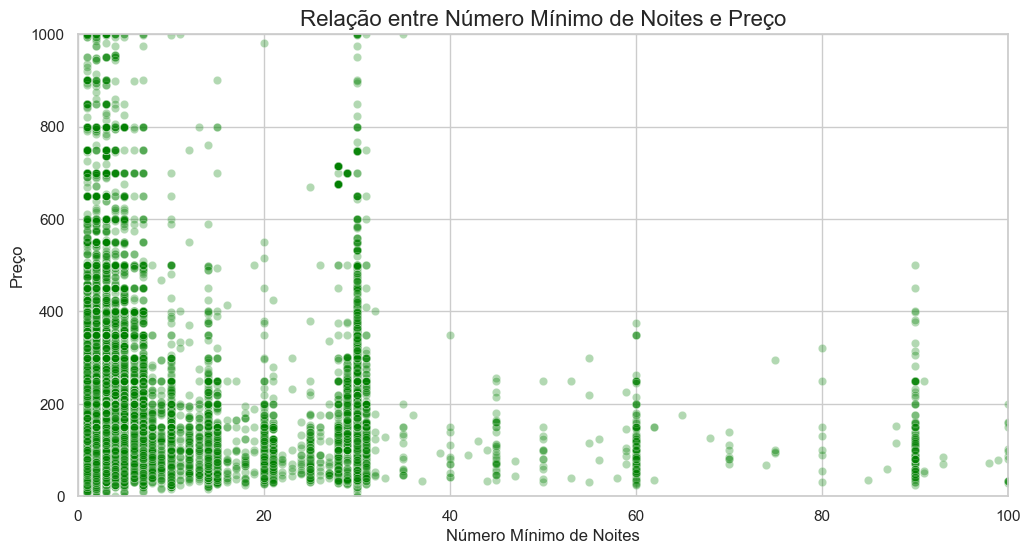

In [18]:
#Número Mínimo de Noites vs. Preço
plt.figure(figsize=(12, 6))
sns.scatterplot(x='minimo_noites', y='price', data=data, alpha=0.3, color='green')
plt.title('Relação entre Número Mínimo de Noites e Preço', fontsize=16)
plt.xlabel('Número Mínimo de Noites', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.ylim(0, 1000)
plt.xlim(0, 100)
plt.show()


## Relação entre Número Mínimo de Noites e Preço

Este gráfico mostra como o número mínimo de noites exigido por um anúncio impacta o preço cobrado por noite.

### Observações:
1. A maioria dos anúncios exige poucas noites como mínimo (entre 1 e 10 noites), com preços concentrados abaixo de \$200.
2. Exigências extremas, como estadias de mais de 30 noites, são menos comuns, mas apresentam uma grande variação de preços.
3. Anúncios com preços altos (acima de \$500) concentram-se em valores baixos de `minimo_noites` (1-10 noites) e tornam-se muito menos frequentes conforme o número mínimo de noites aumenta, quase inexistindo acima de 20 noites.

### Conclusão:
Essas informações sugerem que estadias mais caras tendem a exigir períodos mais curtos de reserva, provavelmente devido ao perfil do público-alvo ou ao tipo de experiência oferecida. Além disso, o preço parece ser mais impactado por fatores como localização.


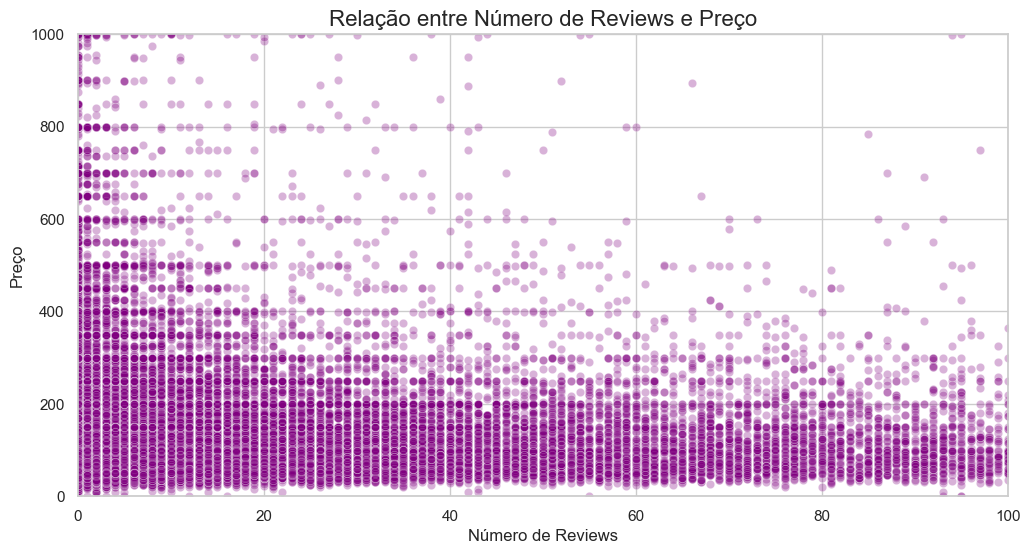

In [22]:
#Número de Reviews vs. Preço
plt.figure(figsize=(12, 6))
sns.scatterplot(x='numero_de_reviews', y='price', data=data, alpha=0.3, color='purple')
plt.title('Relação entre Número de Reviews e Preço', fontsize=16)
plt.xlabel('Número de Reviews', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.ylim(0, 1000) 
plt.xlim(0, 100)  
plt.show()


## Relação entre Número de Reviews e Preço

Neste gráfico, analisamos como o número de reviews recebidos por um anúncio influencia o preço cobrado por noite.

### Observações:
1. A maioria dos anúncios possui preços concentrados abaixo de $200, independentemente do número de reviews.
2. Mesmo anúncios com muitos reviews (acima de 50) continuam na faixa de preços baixos, sugerindo que popularidade não está diretamente associada a preços altos.
3. Não há uma relação clara entre número de reviews e aumento de preço, mas o gráfico indica que anúncios populares tendem a ser acessíveis.

Essas informações podem ser úteis para entender padrões de popularidade e acessibilidade nos preços.


## Respostas às Perguntas do Tópico 2

### Pergunta a:
**"Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?"**

#### Resposta:
1. **Manhattan**:
   - Apresenta os preços médios mais altos, indicando um alto potencial de receita por noite.
   - É ideal para quem quer maximizar o retorno por diária, mesmo com custos de aquisição possivelmente mais altos.
2. **Brooklyn**:
   - É o segundo bairro mais caro e tem maior variação nos preços, oferecendo oportunidades para um público diversificado.

**Conclusão:**
- **Manhattan** é mais indicada para investimentos de alto valor.
- **Brooklyn** pode ser uma alternativa interessante, dependendo do orçamento e da estratégia do investidor.

---

### Pergunta b:
**"O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?"**

#### Resposta:
1. **Número Mínimo de Noites**:
   - Anúncios com preços mais altos (acima de \$500) tendem a concentrar-se em valores baixos de `minimo_noites` (1-10 noites).
   - Conforme o número mínimo de noites aumenta, os anúncios caros tornam-se menos frequentes.

2. **Disponibilidade ao longo do ano**:
   - A maioria dos anúncios com alta disponibilidade (365 dias) tem preços baixos (abaixo de \$200).


In [24]:
from collections import Counter
import pandas as pd

high_price_names = data[data['price'] > 500]['nome']

words = ' '.join(high_price_names.dropna()).lower().split()

word_counts = Counter(words)

word_freq_df = pd.DataFrame(word_counts.most_common(10), columns=['Palavra', 'Frequência'])

print(word_freq_df)



     Palavra  Frequência
0         in         222
1    bedroom         127
2     luxury         121
3       loft         101
4          2          96
5        the          76
6          3          72
7       with          72
8  apartment          72
9          -          70


## Pergunta c: Existe algum padrão no texto do nome do local para lugares de mais alto valor?

Realizamos uma análise das palavras mais frequentes nos nomes de anúncios com preços acima de \$500. Os resultados mostram:

1. Palavras como **"bedroom"**, **"luxury"**, **"loft"** e **"apartment"** aparecem com maior frequência, indicando que anúncios caros tendem a destacar características de exclusividade e tipos específicos de acomodações.
2. Termos genéricos como **"with"** e **"the"** também aparecem, mas não são úteis para inferir padrões específicos.

### Conclusão:
Anúncios de alto valor enfatizam palavras relacionadas ao conforto, luxo e tipos de propriedades específicas, como lofts e apartamentos.
